# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Luqman Hakim
- Email: luqmanxhakim22042002@gmail.com
- Id Dicoding: 2608610

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
!pip install --upgrade scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
!pip install --upgrade joblib

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("/content/data.csv", sep=";")

## Data Understanding

Dataset ini berisi berbagai informasi terkait mahasiswa, dengan total kolom yang merepresentasikan aspek demografis, akademik, administratif, serta latar belakang keluarga. Berikut adalah beberapa kategori utama berdasarkan nama kolom pada dataset:

- Informasi Pribadi Mahasiswa

    - Marital status, Gender, Age at enrollment, Nacionality, International, Displaced, Educational special needs.

- Latar Belakang Pendidikan & Aplikasi

    - Application mode, Application order, Previous qualification, Previous qualification (grade), Admission grade.

- Informasi Akademik Saat Ini

    - Course, Daytime/evening attendance, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved).

- Status Finansial dan Administratif

    - Debtor, Tuition fees up to date, Scholarship holder.

- Latar Belakang Keluarga

    - Mother's qualification, Father's qualification, Mother's occupation, Father's occupation.

Kolom-kolom ini akan menjadi dasar dalam proses eksplorasi dan analisis selanjutnya.

menampilkan 5 baris pertama dari dataframe

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


menampilkan jumlah baris dan kolom dataframe

In [4]:
df.shape

(4424, 37)

menampilkan tipe data dari variabel dataframe

In [5]:
df.dtypes

,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Previous_qualification_grade,float64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64


menampilkan deskriptif dari dataframe

In [6]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


menampilkan jumlat data duplikat

In [8]:
df.duplicated().sum()

np.int64(0)

menampilkan missing value

In [9]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


## Data Preparation / Preprocessing

### Exploratory Data Analysis (EDA)

menampilkan nilai dari kolom "Status"

In [10]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [11]:
df = df[df.Status!='Enrolled']

menampilkan distribusi kolom "Status" dalam visualisasi pie chart

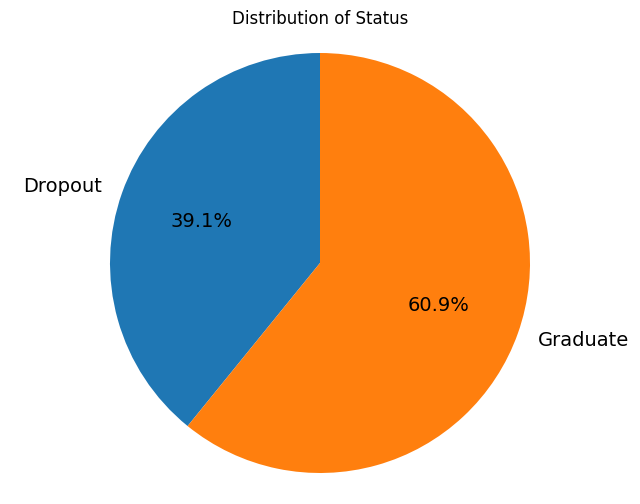

In [12]:
# Menghitung jumlah setiap kategori Status
labels, sizes = np.unique(df['Status'], return_counts=True)

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Distribution of Status')
ax.axis('equal')
plt.show()


mengubah nilai kolom "Status" menjadi numerik

In [13]:
df['Status'] = df['Status'].replace({'Dropout': 0, 'Graduate': 1})

<ipython-input-13-2928264446>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'Dropout': 0, 'Graduate': 1})
<ipython-input-13-2928264446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['Status'].replace({'Dropout': 0, 'Graduate': 1})


menampilkan korelasi dalam bentuk heatmap

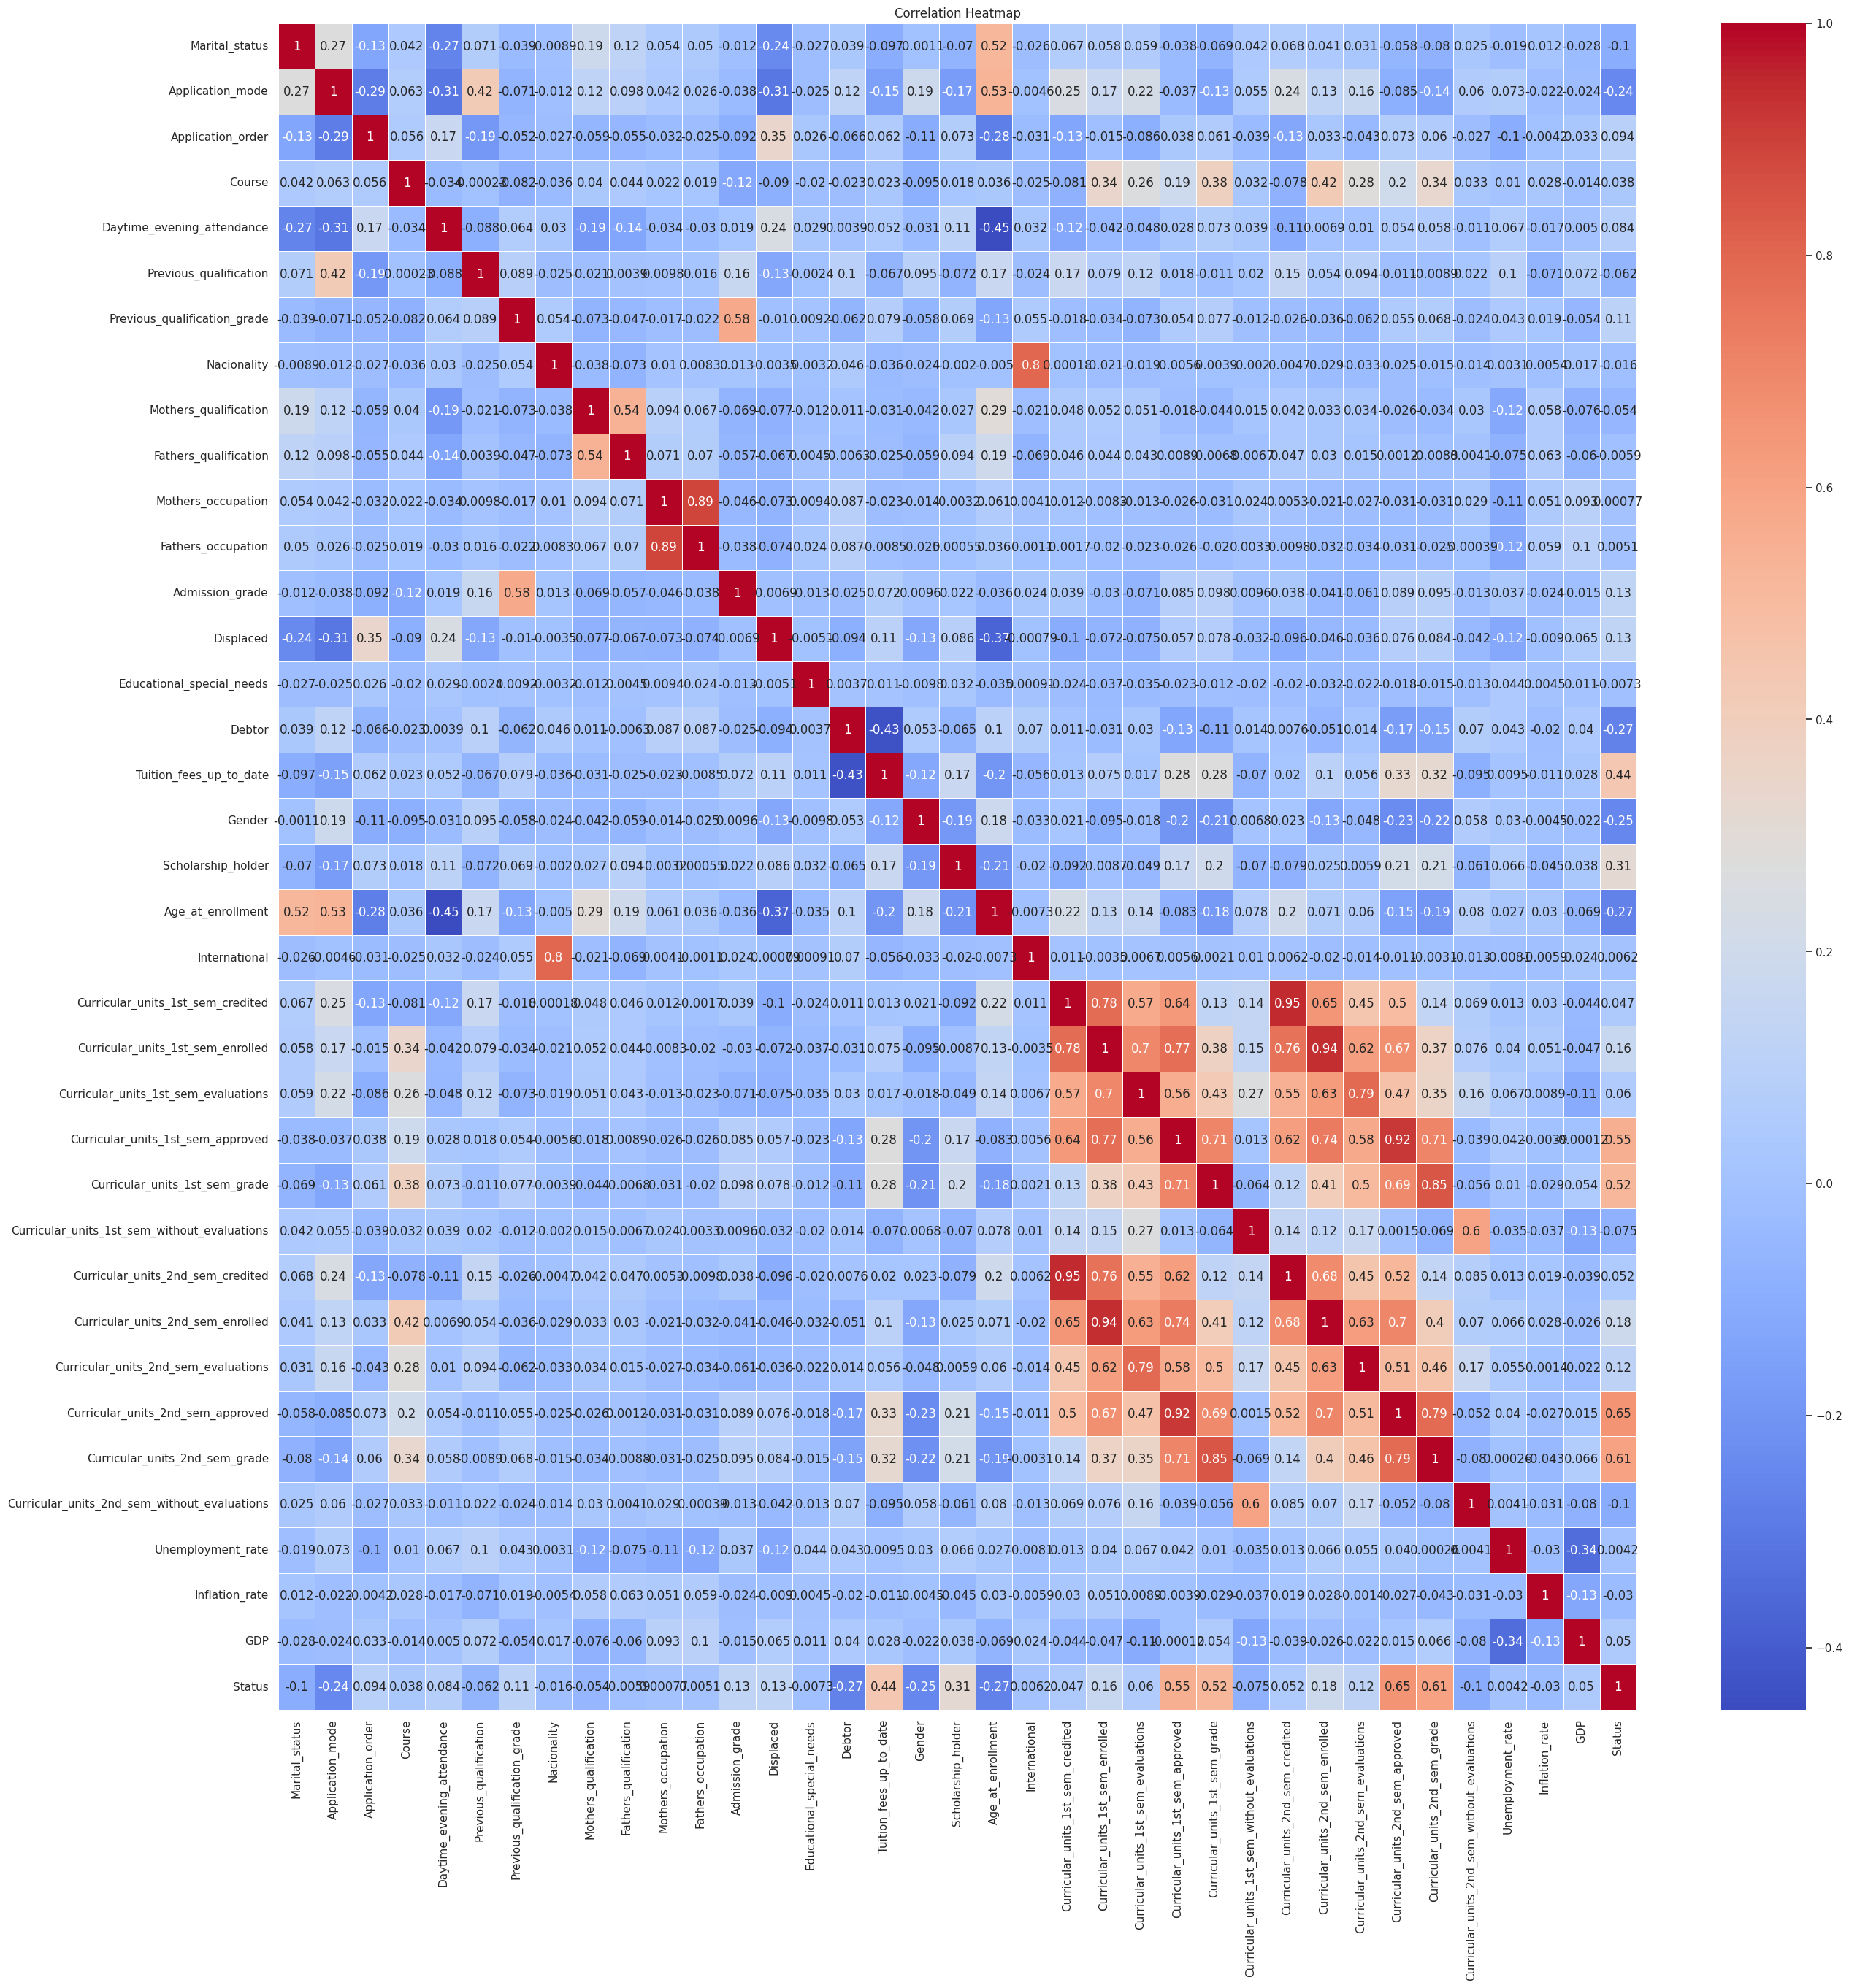

In [14]:
sns.set(style='white')
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

menampilkan korelasi antara "Status" dan variabel lainnya

In [15]:
df.corr()['Status']

,Status
Marital_status,-0.100479
Application_mode,-0.244507
Application_order,0.094355
Course,0.038135
Daytime_evening_attendance,0.084496
Previous_qualification,-0.062323
Previous_qualification_grade,0.109464
Nacionality,-0.015516
Mothers_qualification,-0.053989
Fathers_qualification,-0.005865


Menghapus variabel yang memiliki korelasi kecil dengan "Status" karena dianggap tidak relevan untuk proses pelatihan model.

In [16]:
df.drop(columns=['Marital_status',
                          'Age_at_enrollment',
                          'Application_mode',
                          'Application_order',
                          'Course',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Unemployment_rate',
                          'Inflation_rate',
                          'GDP'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   int64  
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   int64  
 4   Debtor                             3630 non-null   int64  
 5   Tuition_fees_up_to_date            3630 non-null   int64  
 6   Gender                             3630 non-null   int64  
 7   Scholarship_holder                 3630 non-null   int64  
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1

memvisualisasikan korelasi antara "Status" dan variabel lainnya menggunakan diagram batang yang disusun dari nilai korelasi tertinggi ke terendah

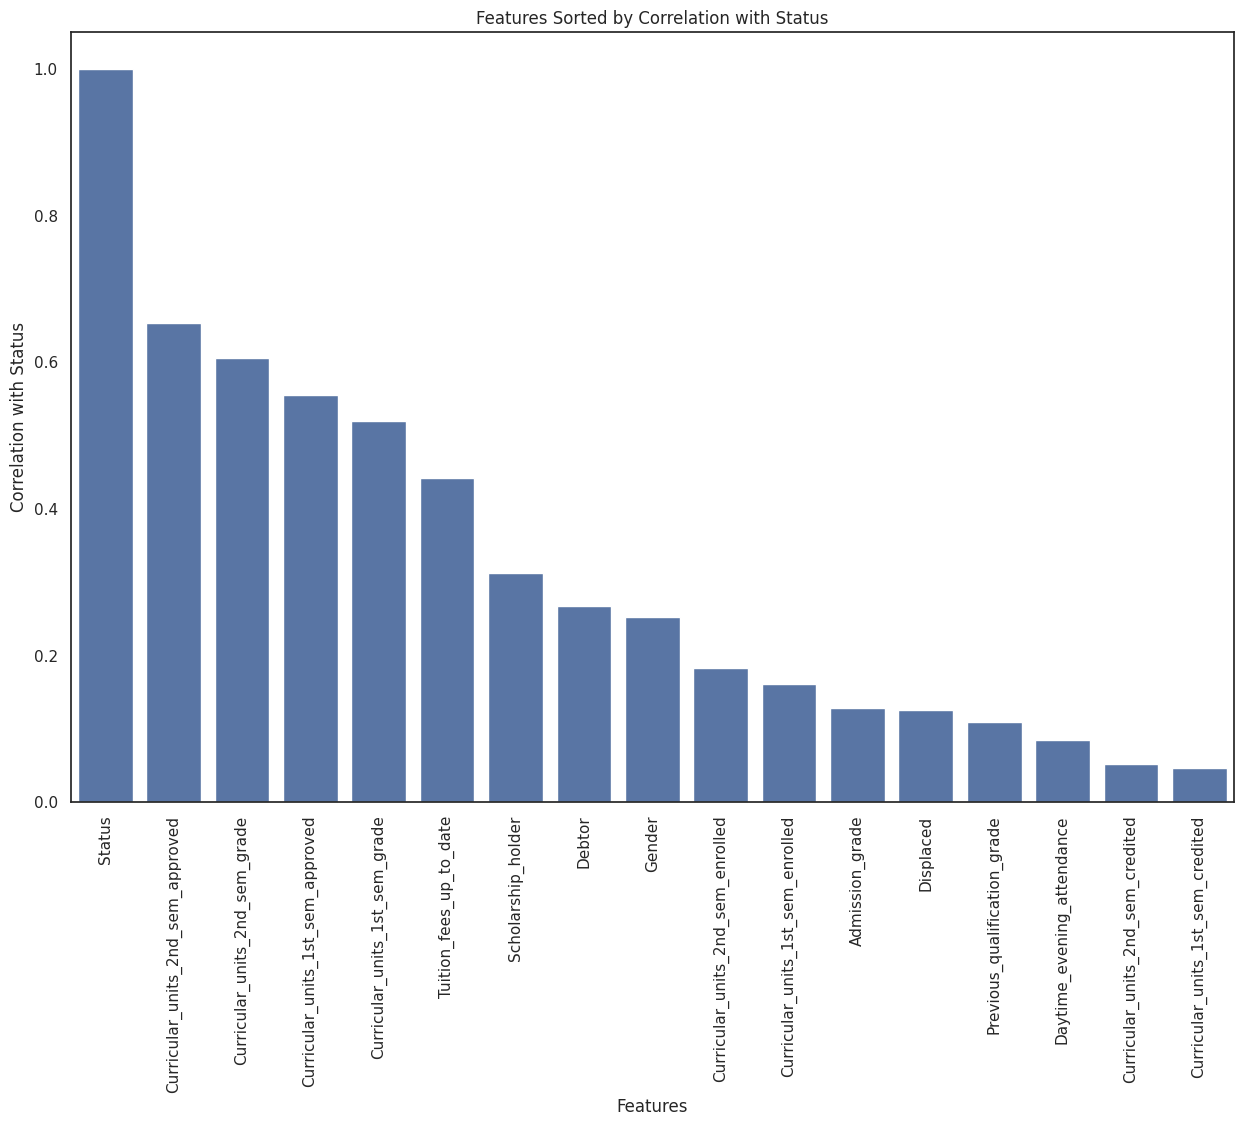

In [17]:
correlations = df.corr()['Status'].abs().sort_values(ascending=False).reset_index()
correlations.columns = ['Feature', 'Correlation']

plt.figure(figsize=(15, 10))
sns.barplot(data=correlations, x='Feature', y='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.xticks(rotation=90)
plt.show()


Melakukan konversi data pada sejumlah variabel dari tipe numerik ke format string (kategori).

In [18]:
df['Gender'] = df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
df['Displaced'] = df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Debtor'] = df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Scholarship_holder'] = df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
df['Status'] = df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})

menampilkan korelasi antara variabel "Status" dan sejumlah variabel lain melalui visualisasi subplot secara bersamaan.

<ipython-input-19-3012574918>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
<ipython-input-19-3012574918>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
<ipython-input-19-3012574918>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
<ipython-input-19-3012574918>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
<ipython-input-19-3012574918>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax

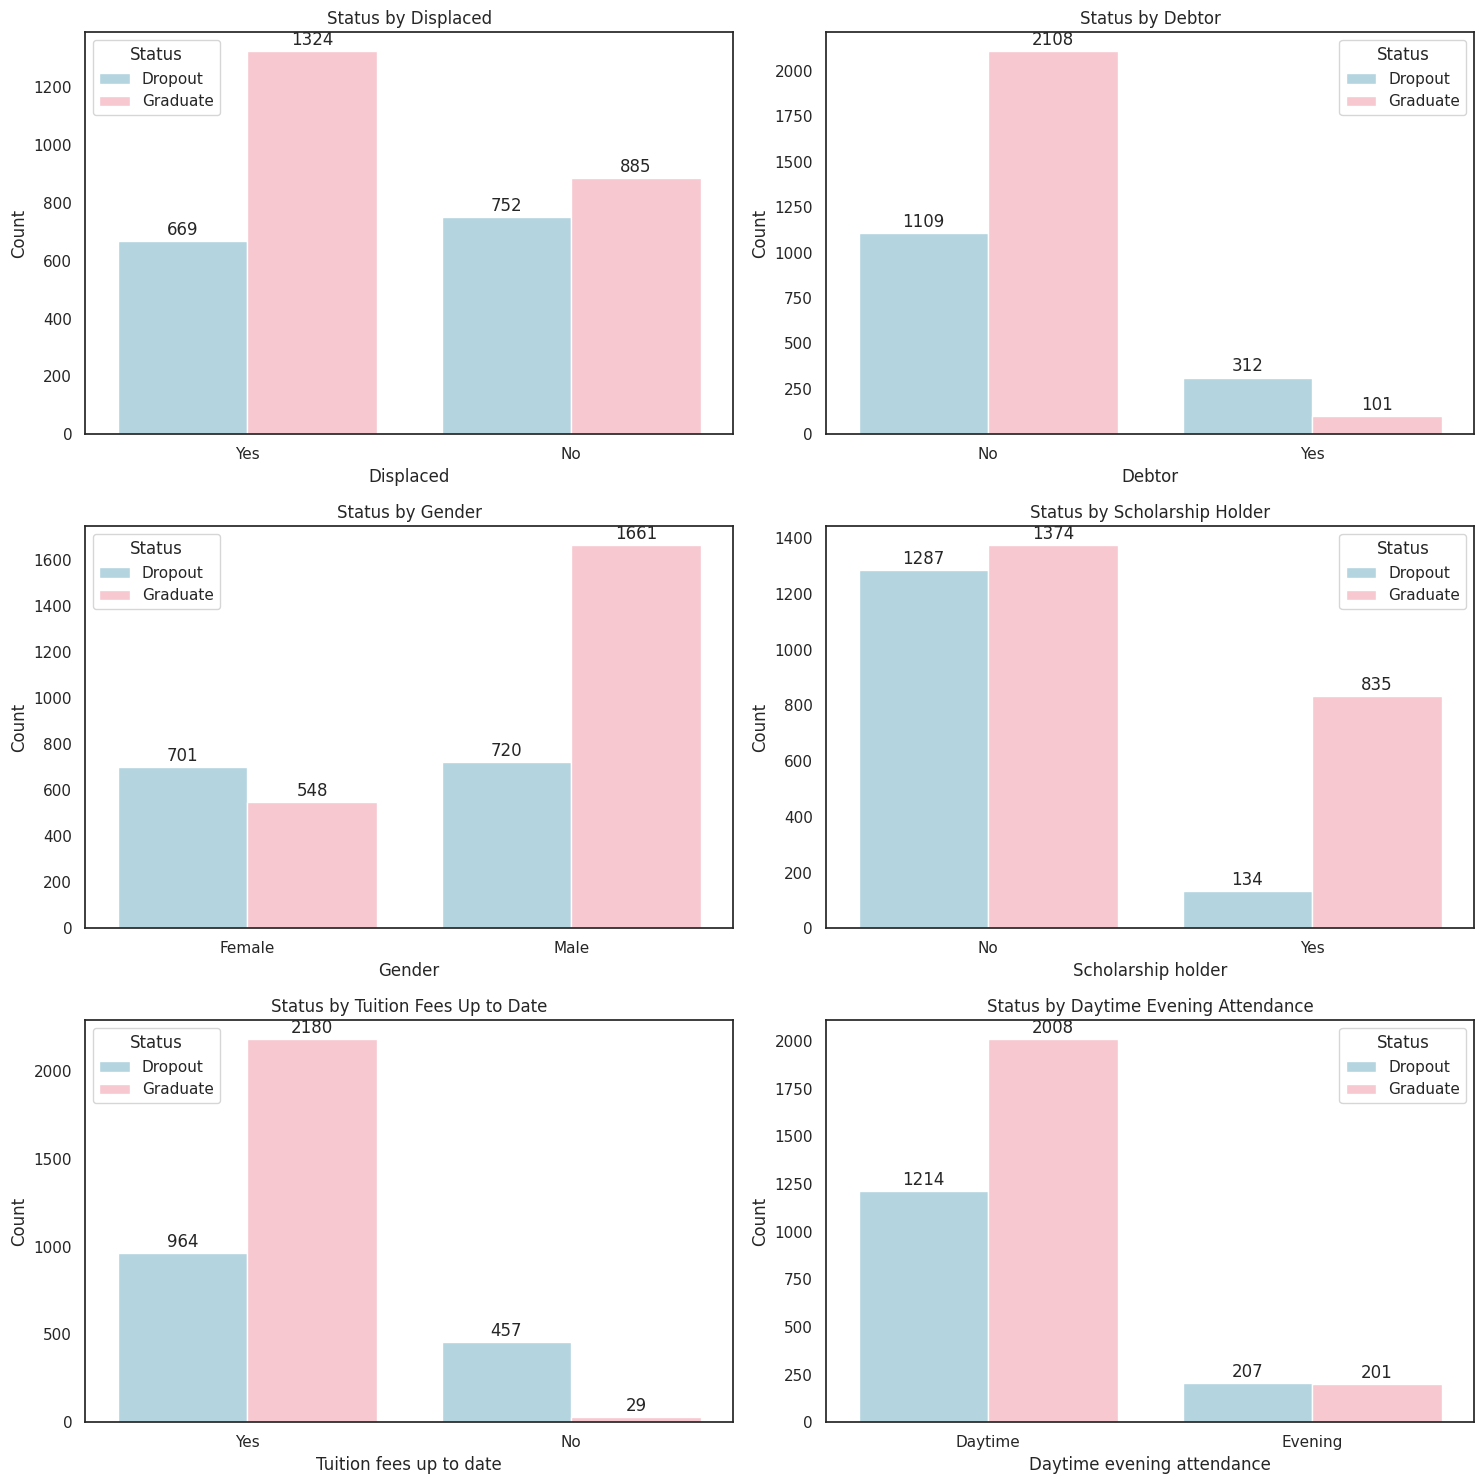

In [19]:
# Define color palette and plot settings
colors = ['lightblue', 'pink', 'lightgreen']
categorical_features = [
    'Displaced', 'Debtor', 'Gender',
    'Scholarship_holder', 'Tuition_fees_up_to_date',
    'Daytime_evening_attendance'
]
titles = [
    'Status by Displaced',
    'Status by Debtor',
    'Status by Gender',
    'Status by Scholarship Holder',
    'Status by Tuition Fees Up to Date',
    'Status by Daytime Evening Attendance'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through features and axes
for i, (feature, ax) in enumerate(zip(categorical_features, axes)):
    sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(feature.replace('_', ' '))
    ax.set_ylabel('Count')
    ax.legend(title='Status', loc='upper left' if i % 2 == 0 else 'upper right', labels=['Dropout', 'Graduate'])

    # Add annotations
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(str(int(p.get_height())),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

## Modeling

filter variable kategori

In [20]:
category_cols = df.select_dtypes(include='object')
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate


pembuatan direktori "model"

melakukan label encoding variable kategori

In [21]:
import os
os.makedirs("model2")

In [22]:
def save_encoders(features, encoder):
    [joblib.dump(encoder, f"model/encoder_{kolom}.joblib") for kolom in features]

features_to_encode = [
    'Daytime_evening_attendance',
    'Displaced',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder'
]

le = LabelEncoder()

for kolom in features_to_encode:
    df[kolom] = le.fit_transform(df[kolom])

save_encoders(features_to_encode, le)

melakukan scaling variable numerik

In [23]:
def store_scalers(cols, scaler_obj):
    for col in cols:
        joblib.dump(scaler_obj, "model/scaler_{}.joblib".format(col))

columns_to_scale = [
    'Admission_grade',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_credited'
]

scaler_instance = StandardScaler()

for feature_name in columns_to_scale:
    transformed = scaler_instance.fit_transform(df[[feature_name]])
    transformed = transformed.reshape(-1, 1)
    df[feature_name] = transformed
    store_scalers([feature_name], scaler_instance)


split dataset 80:20

In [24]:
X = df.drop(columns='Status').values
y = df['Status'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(2904, 16)
(726, 16)


encoding variable target

In [25]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
joblib.dump(label_encoder, "model/encoder_target.joblib")

y_test = label_encoder.transform(y_test)

### Model Logistic Regression

In [26]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Set up hyperparameter grid
grid_parameters = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 150, 250, 400],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Configure the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=grid_parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model using GridSearch
best_model = grid_search.fit(X_train, y_train)

# Predict on test data
predictions = best_model.predict(X_test)

# Output best hyperparameters
print("Best parameters:", best_model.best_params_)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, predictions)
print("The test accuracy score of Logistic Regression is", accuracy)

Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
The test accuracy score of Logistic Regression is 0.9077134986225895


### Model Random Forest

In [27]:
# Create a Random Forest Classifier instance
rf_model = RandomForestClassifier()

# Specify hyperparameter grid
hyperparams = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=hyperparams,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the training data
fitted_rf_model = grid_search_rf.fit(X_train, y_train)

# Generate predictions for the test set
predictions = fitted_rf_model.predict(X_test)

# Display best hyperparameters
print("Best parameters:", fitted_rf_model.best_params_)

# Evaluate and print test accuracy
rf_accuracy = accuracy_score(y_test, predictions)
print("The test accuracy score of Random Forest Classifier is", rf_accuracy)


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
The test accuracy score of Random Forest Classifier is 0.9008264462809917


### Model Decision Tree

In [28]:
# Create Decision Tree Classifier instance
dt_model = DecisionTreeClassifier()

# Set up hyperparameter grid
grid_params = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Configure GridSearchCV
dt_search = GridSearchCV(
    estimator=dt_model,
    param_grid=grid_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train model using the grid search
dt_search_result = dt_search.fit(X_train, y_train)

# Predict using the best estimator
predictions = dt_search_result.predict(X_test)

# Display best parameter configuration
print("Best parameters:", dt_search_result.best_params_)

# Calculate and show accuracy on test data
accuracy = accuracy_score(y_test, predictions)
print("The test accuracy score of Decision Tree Classifier is", accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.8801652892561983


### Model Gradient Boosting

In [29]:
# Create an instance of Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Define hyperparameter search space
search_space = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=search_space,
    cv=5,
    scoring='accuracy'
)

# Fit the model with training data
grid_result = grid_search.fit(X_train, y_train)

# Generate predictions on the test set
predictions = grid_result.predict(X_test)

# Output best parameters
print("Best parameters:", grid_result.best_params_)

# Compute and output accuracy on test set
accuracy = accuracy_score(y_test, predictions)
print("The test accuracy score of Gradient Boosting Classifier is", accuracy)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
The test accuracy score of Gradient Boosting Classifier is 0.8911845730027548


## Evaluation

### Logistic Regression

In [31]:
# Compute confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, predictions)
print("Confusion Matrix of Logistric Regression:")
print(cm_lr)

Confusion Matrix of Logistric Regression:
[[229  48]
 [ 31 418]]


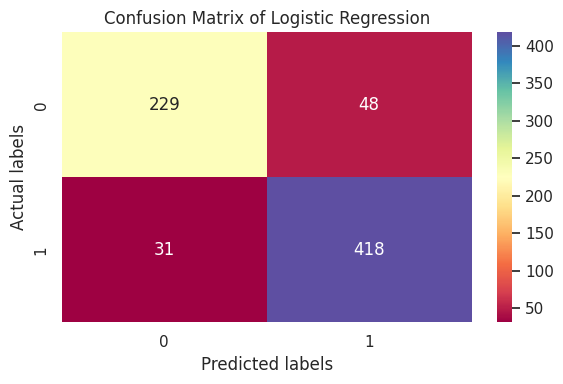

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, cmap='Spectral', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Logistic Regression')
plt.tight_layout()
plt.show()

In [34]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, predictions))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



Random Forest

In [36]:
# Menghitung confusion matrix dengan argumen eksplisit
rf_cm = confusion_matrix(y_true=y_test, y_pred=predictions)
print("Confusion Matrix of Random Forest Classifier:")
for row in rf_cm:
    print(row)

Confusion Matrix of Random Forest Classifier:
[229  48]
[ 31 418]


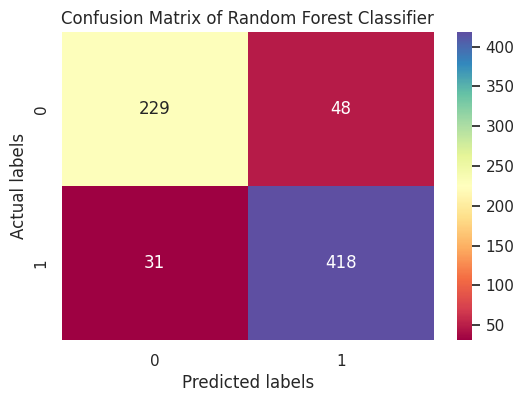

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [38]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, predictions))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



Decision Tree

In [39]:
# Membuat confusion matrix dan menampilkannya
dt_cm = confusion_matrix(y_true=y_test, y_pred=predictions)
print("Confusion Matrix of Decision Tree Classifier:\n{}".format(dt_cm))

Confusion Matrix of Decision Tree Classifier:
[[229  48]
 [ 31 418]]


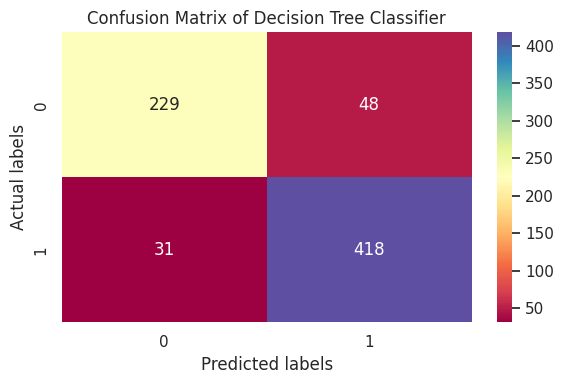

In [40]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
sns.heatmap(dt_cm, annot=True, cmap='Spectral', fmt='g', ax=ax)
ax.set(xlabel='Predicted labels', ylabel='Actual labels', title='Confusion Matrix of Decision Tree Classifier')
plt.tight_layout()
plt.show()

In [41]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, predictions, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



Gradient Boosting

In [42]:
gb_cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix of Gradient Boosting Classifier:\n{}".format(gb_cm))

Confusion Matrix of Gradient Boosting Classifier:
[[229  48]
 [ 31 418]]


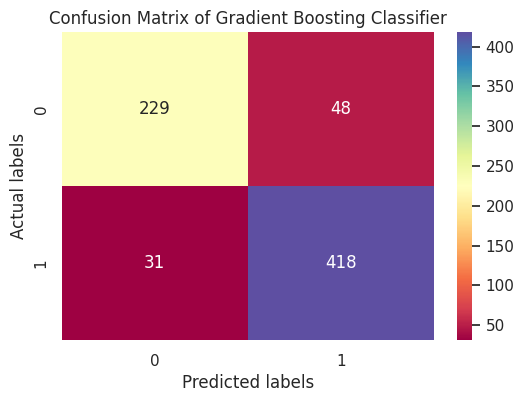

In [43]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
sns.heatmap(gb_cm, annot=True, fmt='g', cmap='Spectral', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

In [44]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, predictions))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



## Deployment

Save model logistic regression

In [ ]:
joblib.dump(best_model, 'logistic_regression_model.joblib')

In [ ]:
# Load model
loaded_model = joblib.load("logistic_regression_model.joblib")

# Save the loaded model
joblib.dump(loaded_model.best_estimator_, "logistic_regression_best_model.joblib")

In [ ]:
# 1. Install dulu zip utility (jika belum tersedia)
!apt install zip -y

# 2. Zip folder 'model/' menjadi 'model.zip'
!zip -r model2.zip model2/

# 3. Import library untuk download file
from google.colab import files

# 4. Download file zip ke komputer lokal
files.download('model2.zip')